# Giới thiệu #

Bài học này và bài học tiếp theo sử dụng các thuật toán được gọi là *học không giám sát* (*unsupervised learning*). Các thuật toán không giám sát không sử dụng mục tiêu (*target*); thay vào đó, chúng nhằm mục đích học một số thuộc tính của dữ liệu, biểu diễn cấu trúc của các đặc trưng theo một cách nhất định. Trong bối cảnh kỹ thuật đặc trưng để dự đoán, bạn có thể coi một thuật toán không giám sát là một kỹ thuật "khám phá đặc trưng".

**Phân cụm** (*Clustering*) đơn giản có nghĩa là gán các điểm dữ liệu vào các nhóm dựa trên mức độ tương đồng giữa chúng. Một thuật toán phân cụm giúp "chim cùng loài tụ lại với nhau," theo nghĩa bóng.

Khi được sử dụng cho kỹ thuật đặc trưng, chúng ta có thể cố gắng khám phá các nhóm khách hàng đại diện cho một phân khúc thị trường, chẳng hạn, hoặc các khu vực địa lý có cùng kiểu thời tiết. Việc thêm một đặc trưng dưới dạng nhãn cụm có thể giúp các mô hình học máy phân tách các mối quan hệ phức tạp về không gian hoặc mức độ gần gũi.

# Nhãn cụm như một đặc trưng #

Khi áp dụng cho một đặc trưng liên tục, phân cụm hoạt động tương tự như một phép "phân loại theo khoảng" truyền thống hoặc [chuyển đổi "rời rạc hóa"](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_classification.html). Khi áp dụng cho nhiều đặc trưng, nó giống như "phân loại theo khoảng đa chiều" (*multi-dimensional binning*), đôi khi được gọi là *lượng tử hóa véc-tơ* (*vector quantization*).

<figure style="padding: 1em;">
<img src="../_static/images/sr3pdYI.png" width=800 alt="">
<figcaption style="text-align: center; font-style: italic"><center><strong>Bên trái:</strong> Phân cụm một đặc trưng. <strong>Bên phải:</strong> Phân cụm trên hai đặc trưng.</center></figcaption>
</figure>

Khi được thêm vào một dataframe, một đặc trưng nhãn cụm có thể trông như sau:

| Kinh độ (Longitude) | Vĩ độ (Latitude) | Cụm (Cluster) |
|---------------------|------------------|---------------|
| -93.619           | 42.054           | 3             |
| -93.619           | 42.053           | 3             |
| -93.638           | 42.060           | 1             |
| -93.602           | 41.988           | 0             |

Điều quan trọng cần nhớ là đặc trưng `Cluster` này là một biến phân loại (*categorical*). Ở đây, nó được thể hiện bằng cách mã hóa nhãn (*label encoding*), tức là dưới dạng một dãy số nguyên giống như cách các thuật toán phân cụm thông thường tạo ra. Tuy nhiên, tùy vào mô hình của bạn, mã hóa one-hot có thể phù hợp hơn.

Ý tưởng chính của việc thêm nhãn cụm là các cụm sẽ chia nhỏ các mối quan hệ phức tạp giữa các đặc trưng thành những phần đơn giản hơn. Khi đó, mô hình của chúng ta chỉ cần học từng phần đơn giản một cách riêng lẻ thay vì phải học toàn bộ mối quan hệ phức tạp cùng một lúc. Đây là chiến lược "chia để trị" (*divide and conquer*).

<figure style="padding: 1em;">
<img src="../_static/images/rraXFed.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center>Phân cụm đặc trưng YearBuilt giúp mô hình tuyến tính học được mối quan hệ của nó với SalePrice.</center></figcaption>
</figure>

Hình minh họa trên cho thấy cách phân cụm có thể cải thiện một mô hình tuyến tính đơn giản. Mối quan hệ cong giữa `YearBuilt` và `SalePrice` quá phức tạp đối với loại mô hình này — nó bị *underfit* (không khớp tốt với dữ liệu). Tuy nhiên, khi chia nhỏ dữ liệu thành các cụm nhỏ hơn, mối quan hệ trở nên *gần như* tuyến tính, và mô hình có thể học một cách dễ dàng hơn.

# Phân cụm k-Means #

Có rất nhiều thuật toán phân cụm khác nhau. Chúng chủ yếu khác nhau ở cách đo lường "độ tương đồng" hoặc "khoảng cách" giữa các điểm dữ liệu, cũng như loại đặc trưng mà chúng có thể xử lý. Thuật toán mà chúng ta sẽ sử dụng, k-means, là một phương pháp trực quan và dễ áp dụng trong kỹ thuật đặc trưng. Tuy nhiên, tùy vào ứng dụng của bạn, một thuật toán khác có thể phù hợp hơn.

**Phân cụm k-Means** đo độ tương đồng bằng khoảng cách đường thẳng thông thường (*khoảng cách Euclidean*). Nó tạo các cụm bằng cách đặt một số điểm gọi là **centroid** trong không gian đặc trưng. Mỗi điểm trong tập dữ liệu được gán vào cụm có tâm cụm gần nhất. Chữ "k" trong "k-means" đại diện cho số lượng tâm cụm (tức là số cụm) mà thuật toán sẽ tạo. Bạn phải tự xác định giá trị k này.

Bạn có thể tưởng tượng mỗi tâm cụm thu hút các điểm xung quanh thông qua một chuỗi vòng tròn đồng tâm. Khi các vòng tròn từ các tâm cụm khác nhau giao nhau, chúng tạo thành một đường ranh giới. Kết quả là một **lát cắt Voronoi** (*Voronoi tessellation*). Lát cắt này cho thấy cách các điểm dữ liệu mới sẽ được gán vào các cụm trong tương lai; về bản chất, đây là thứ mà k-means học được từ dữ liệu huấn luyện.

Tập dữ liệu [*Ames*](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) ở trên được phân cụm bằng k-means. Dưới đây là hình minh họa với lát cắt Voronoi và các tâm cụm được hiển thị.

<figure style="padding: 1em;">
<img src="../_static/images/KSoLd3o.jpg" width=450, alt="">
<figcaption style="textalign: center; font-style: italic"><center>Phân cụm k-Means tạo ra một lát cắt Voronoi của không gian đặc trưng.</center></figcaption>
</figure>

Hãy xem lại cách thuật toán k-means học các cụm và ý nghĩa của nó đối với kỹ thuật đặc trưng. Chúng ta sẽ tập trung vào ba tham số quan trọng trong triển khai của scikit-learn: `n_clusters`, `max_iter`, và `n_init`.

Quá trình học rất đơn giản và diễn ra theo hai bước. Thuật toán bắt đầu bằng cách khởi tạo ngẫu nhiên một số lượng nhất định (`n_clusters`) các tâm cụm. Sau đó, nó lặp đi lặp lại hai bước sau:
1. Gán các điểm dữ liệu vào tâm cụm gần nhất.
2. Dịch chuyển mỗi tâm cụm để giảm khoảng cách trung bình giữa nó và các điểm dữ liệu của nó.

Quá trình này tiếp tục cho đến khi các tâm cụm không còn di chuyển đáng kể nữa hoặc khi thuật toán đạt đến số vòng lặp tối đa (`max_iter`).

Thỉnh thoảng, vị trí khởi tạo ngẫu nhiên của các tâm cụm có thể dẫn đến một phân cụm kém hiệu quả. Vì lý do này, thuật toán thường lặp lại nhiều lần (`n_init`) và chọn kết quả có tổng khoảng cách giữa các điểm dữ liệu và tâm cụm thấp nhất, tức là phân cụm tối ưu.

Hình động dưới đây minh họa cách thuật toán hoạt động. Nó cho thấy sự phụ thuộc của kết quả vào vị trí ban đầu của các tâm cụm và tầm quan trọng của việc lặp lại đến khi hội tụ.

<figure style="padding: 1em;">
<img src="../_static/images/tBkCqXJ.gif" width=550, alt="">
<figcaption style="textalign: center; font-style: italic"><center>Thuật toán phân cụm K-means trên dữ liệu Airbnb ở NYC.</center></figcaption>
</figure>

Bạn có thể cần tăng `max_iter` khi số cụm lớn hoặc tăng `n_init` cho tập dữ liệu phức tạp. Tuy nhiên, thông thường, tham số duy nhất bạn cần tự chọn là `n_clusters` (tức là k). Việc phân chia tối ưu các đặc trưng phụ thuộc vào mô hình bạn đang sử dụng và mục tiêu dự đoán của bạn, vì vậy tốt nhất là điều chỉnh nó như một siêu tham số (chẳng hạn bằng cách dùng *cross-validation*).

# Ví dụ - Nhà ở California #

Với các đặc trưng không gian, `'Latitude'` và `'Longitude'` trong tập dữ liệu [*California Housing*](https://www.kaggle.com/camnugent/california-housing-prices) là những ứng viên tự nhiên cho phân cụm k-means. Trong ví dụ này, chúng ta sẽ phân cụm những đặc trưng này cùng với `'MedInc'` (thu nhập trung vị) để tạo ra các phân đoạn kinh tế cho các khu vực khác nhau của California.


In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

df = pd.read_csv("housing.csv")
X = df.loc[:, ["MedInc", "Latitude", "Longitude"]]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


Vì phân cụm k-means nhạy cảm với thang đo, nên việc chuẩn hóa hoặc đưa dữ liệu về cùng một quy mô có thể là một ý tưởng tốt, đặc biệt khi có các giá trị cực đoan. Tuy nhiên, vì các đặc trưng của chúng ta đã có quy mô xấp xỉ tương đương, nên chúng ta sẽ giữ nguyên chúng như hiện tại.

In [16]:
# Create cluster feature
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,0
1,8.3014,37.86,-122.22,0
2,7.2574,37.85,-122.24,0
3,5.6431,37.85,-122.25,0
4,3.8462,37.85,-122.25,5


Bây giờ, hãy xem một vài biểu đồ để đánh giá hiệu quả của phân cụm. Đầu tiên, một biểu đồ phân tán hiển thị sự phân bố địa lý của các cụm. Có vẻ như thuật toán đã tạo ra các phân đoạn riêng biệt cho các khu vực có thu nhập cao hơn ở vùng ven biển.

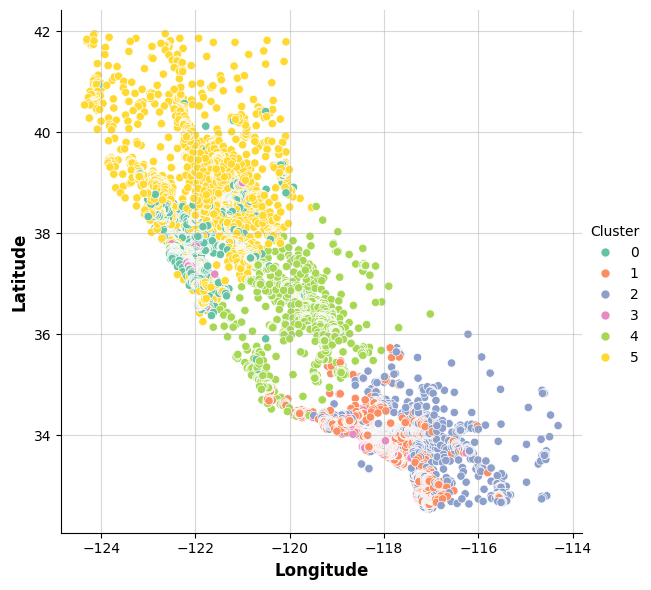

In [17]:
sns.relplot(x="Longitude", y="Latitude", hue="Cluster", data=X, palette="Set2", height=6);
plt.grid(alpha = 0.5)

Mục tiêu trong tập dữ liệu này là `MedHouseVal` (giá trị nhà trung vị). Các biểu đồ hộp (*box-plot*) dưới đây thể hiện phân bố của mục tiêu trong từng cụm. Nếu phân cụm có ý nghĩa, các phân bố này sẽ phần lớn tách biệt theo `MedHouseVal`, và thực tế, điều này đúng như những gì chúng ta quan sát được.

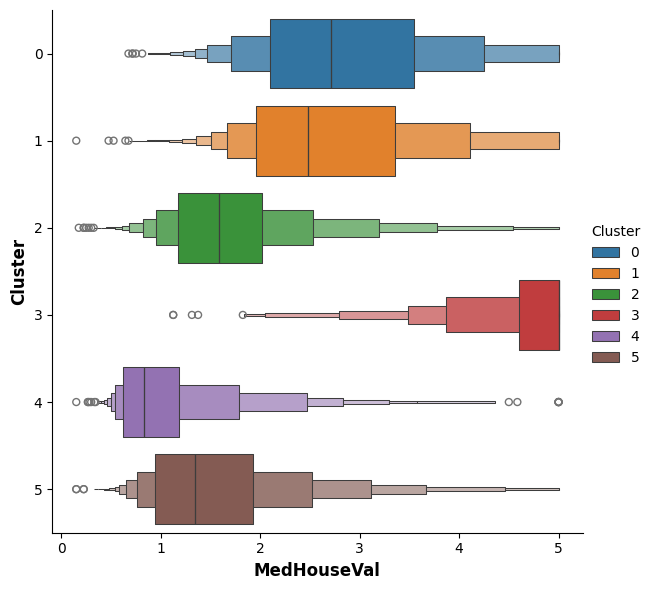

In [18]:
X["MedHouseVal"] = df["MedHouseVal"]
sns.catplot(x="MedHouseVal", y="Cluster", data=X, kind="boxen", height=6, hue = 'Cluster');

# Đến lượt bạn #

[**Thêm một đặc trưng nhãn cụm**](https://www.kaggle.com/kernels/fork/14393920) vào *Ames* và tìm hiểu thêm về một loại đặc trưng khác mà phân cụm có thể tạo ra.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/feature-engineering/discussion) to chat with other learners.*